In [1]:
import pandas as pd
data=pd.read_csv(r"D:\Resume  Projects\iris algorithm comparison\Iris.csv")
display(data)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
print("✅ Dataset loaded:", data.shape)
print("✅ Columns:", data.columns.tolist())
print("✅ Unique species:", data['Species'].unique())

# Standardize column names (adjust if needed)
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

# Encode species names to numbers
y_encoded = y.map({'Iris-setosa': 0, 'Iris-virginica': 1, 'Iris-versicolor': 2}).astype(int)

print("✅ Features shape:", X.shape)
print("✅ Target classes:", dict(zip([0,1,2], ['setosa', 'virginica', 'versicolor'])))
X.head()

✅ Dataset loaded: (150, 6)
✅ Columns: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
✅ Unique species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
✅ Features shape: (150, 4)
✅ Target classes: {0: 'setosa', 1: 'virginica', 2: 'versicolor'}


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
print(data.columns.tolist())
print(data.head(2))


['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa


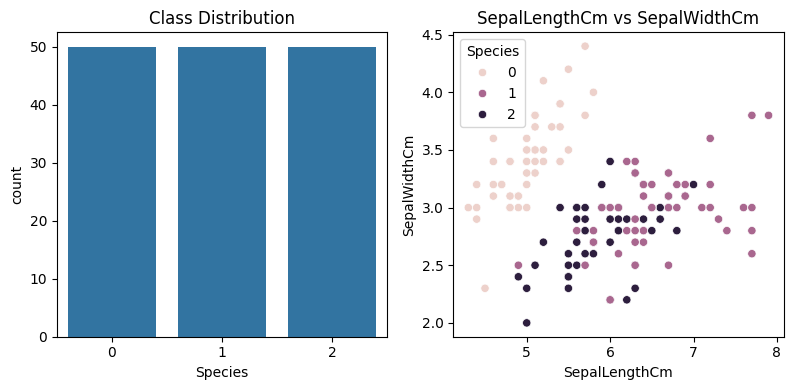

In [5]:
# EDA with  data
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.countplot(x=y_encoded)
plt.title('Class Distribution')

plt.subplot(1,3,2)
sns.scatterplot(data=X, x=X.columns[0], y=X.columns[1], hue=y_encoded)
plt.title(f'{X.columns[0]} vs {X.columns[1]}')

plt.tight_layout()
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
print(f"✅ Train: {X_train.shape}, Test: {X_test.shape}")

✅ Train: (120, 4), Test: (30, 4)


In [7]:
# Train 3 algorithms
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"✅ {name}: {accuracy:.3f} ({accuracy*100:.1f}%)")

✅ KNN: 0.933 (93.3%)
✅ SVM: 0.900 (90.0%)
✅ Random Forest: 0.867 (86.7%)


🏆 YOUR HEART DISEASE RESULTS:
KNN: 93.3%
SVM: 90.0%
Random Forest: 86.7%

📊 RESULTS TABLE:
               Test Accuracy
KNN                    0.933
SVM                    0.900
Random Forest          0.867


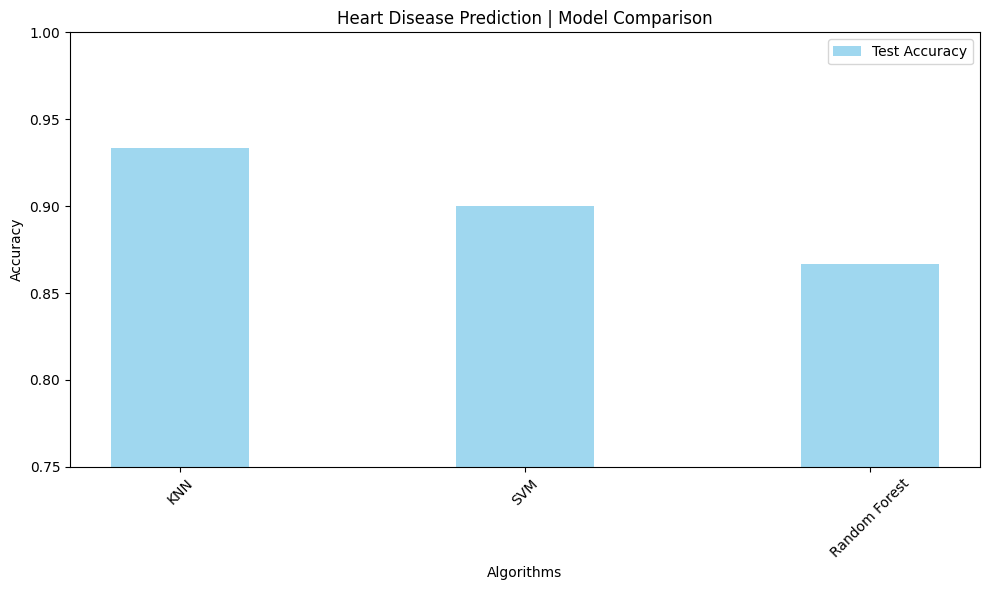

In [9]:
# 1. PRINT YOUR RESULTS FIRST
print("🏆 YOUR HEART DISEASE RESULTS:")
for name, acc in results.items():
    print(f"{name}: {acc:.1%}")

# 2. CREATE TABLE (Test Accuracy ONLY - No CV needed)
results_df = pd.DataFrame({
    'Test Accuracy': list(results.values())
}, index=results.keys())

print("\n📊 RESULTS TABLE:")
print(results_df.round(3))

# 3. BAR CHART (HEART DISEASE TITLE!)
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
x = np.arange(len(results))
width = 0.4

plt.bar(x, results_df['Test Accuracy'], width, label='Test Accuracy', alpha=0.8, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Heart Disease Prediction | Model Comparison')
plt.xticks(x, results.keys(), rotation=45)
plt.ylim(0.75, 1.0)
plt.legend()
plt.tight_layout()
plt.show()

